In [5]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline

In [6]:
df = gpd.read_file('airbnb_Chicago 2015.shp')

In [7]:
df.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,POLYGON ((-87.60914087617012 41.84469250346108...
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.592152838785 41.81692934706861, ..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,POLYGON ((-87.62879823732874 41.80189303448802...
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,POLYGON ((-87.60670812560372 41.81681377137391...
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.592152838785 41.81692934706861, ..."


In [8]:
pd.isnull(df['price_pp']).sum()

8

In [9]:
df = df
df['price_pp'].fillna((df['price_pp'].mean()), inplace=True)

In [10]:
import seaborn as sbn

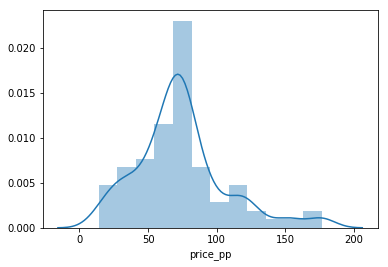

In [11]:
sbn.distplot(df['price_pp'])

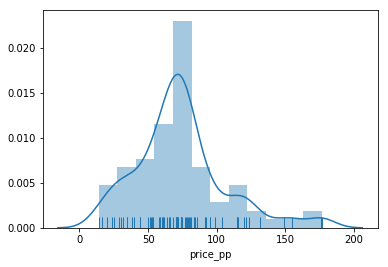

In [12]:
sbn.distplot(df['price_pp'], rug=True)

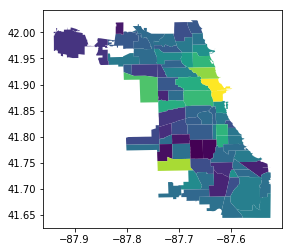

In [13]:
df.plot(column='price_pp')

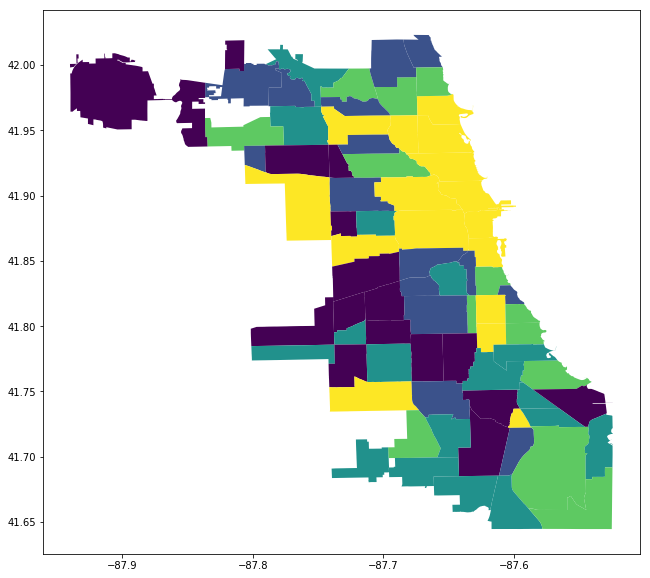

In [14]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', ax=ax)

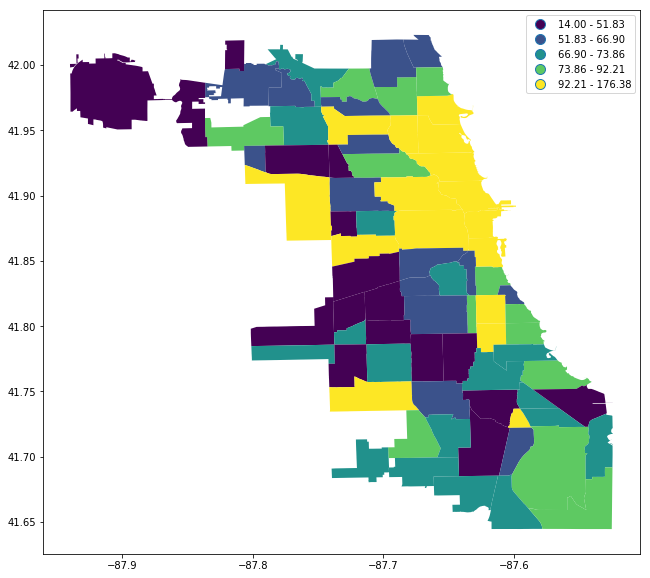

In [15]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles',  legend=True, ax=ax)

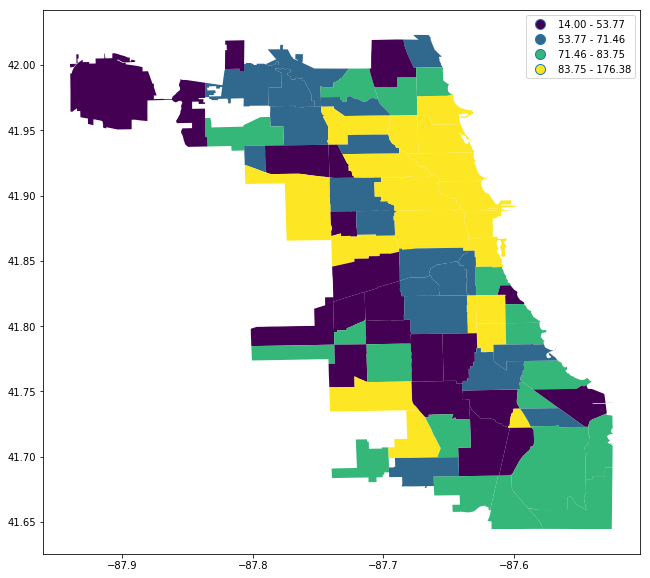

In [16]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax)

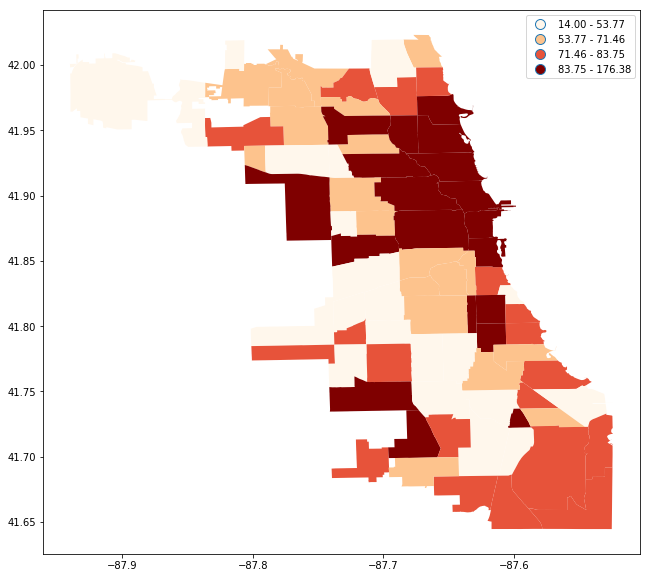

In [17]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax, 
        cmap='OrRd')

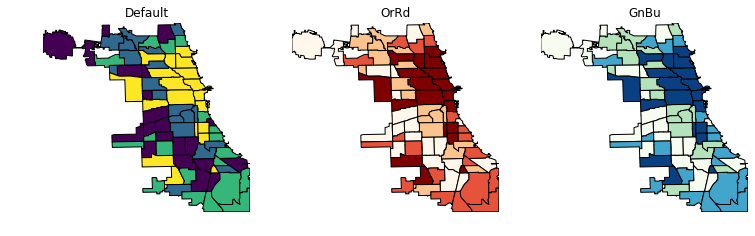

In [18]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Default")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("OrRd")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("GnBu")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

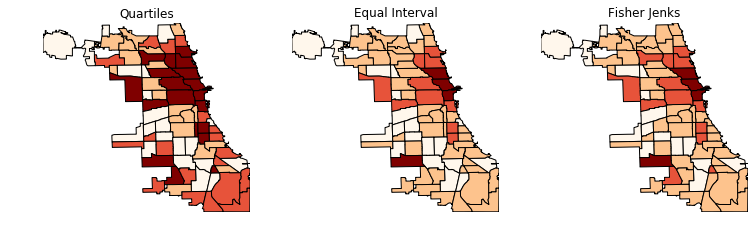

In [19]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='OrRd', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Quartiles")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='equal_interval', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Equal Interval")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
       scheme='fisher_jenks', cmap='OrRd', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Fisher Jenks")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [22]:
import mapclassify as mc

In [23]:
mc.CLASSIFIERS

('Box_Plot',
 'Equal_Interval',
 'Fisher_Jenks',
 'Fisher_Jenks_Sampled',
 'HeadTail_Breaks',
 'Jenks_Caspall',
 'Jenks_Caspall_Forced',
 'Jenks_Caspall_Sampled',
 'Max_P_Classifier',
 'Maximum_Breaks',
 'Natural_Breaks',
 'Quantiles',
 'Percentiles',
 'Std_Mean',
 'User_Defined')

In [24]:
y = df['price_pp']
ea5 = mc.Equal_Interval(y, k=5)

In [25]:
ea5

              Equal Interval              
 
 Lower            Upper              Count
          x[i] <=  46.475               14
 46.475 < x[i] <=  78.950               38
 78.950 < x[i] <= 111.425               14
111.425 < x[i] <= 143.900                7
143.900 < x[i] <= 176.376                4

In [26]:
ea5.yb

array([1, 1, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 3, 3, 2, 0, 1, 2, 1, 1, 4, 4, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 4, 4, 1, 2, 1, 1, 1, 0, 1, 0])

In [27]:
q5 = mc.Quantiles(y, k=5)
q5

                Quantiles                 
 
 Lower            Upper              Count
          x[i] <=  51.833               16
 51.833 < x[i] <=  66.897               15
 66.897 < x[i] <=  73.864               17
 73.864 < x[i] <=  92.206               13
 92.206 < x[i] <= 176.376               16

In [28]:
y.shape

(77,)

In [29]:
np.unique(y).shape

(67,)

In [30]:
q5 = mc.Quantiles(y, k=5)
ei5 = mc.Equal_Interval(y, k=5)
mb5 = mc.Maximum_Breaks(y, k=5)
fj5 = mc.Fisher_Jenks(y, k=5)
fits = [c.adcm for c in [q5, ei5, mb5, fj5]]
fits

[598.0520588840582, 539.643737884058, 1096.390616884058, 488.9713821014492]

In [31]:
ht = mc.HeadTail_Breaks(y)
ht

             HeadTail_Breaks              
 
 Lower            Upper              Count
          x[i] <=  73.864               48
 73.864 < x[i] <=  98.160               16
 98.160 < x[i] <= 130.727                8
130.727 < x[i] <= 157.566                3
157.566 < x[i] <= 176.254                1
176.254 < x[i] <= 176.376                1

In [32]:
td = mc.Std_Mean(y)
std

NameError: name 'std' is not defined

In [33]:
bp = mc.Box_Plot(y)
bp

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

In [34]:
bp

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

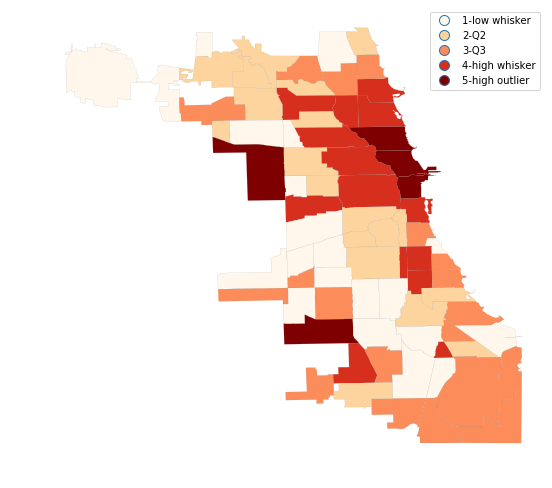

In [44]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

In [50]:
import palettable as pltt

In [49]:
from palettable import Darjeeling2_5 as wes

ImportError: cannot import name 'Darjeeling2_5' from 'palettable' (C:\Users\Gabe\Anaconda3\lib\site-packages\palettable\__init__.py)

ValueError: Colormap wes is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

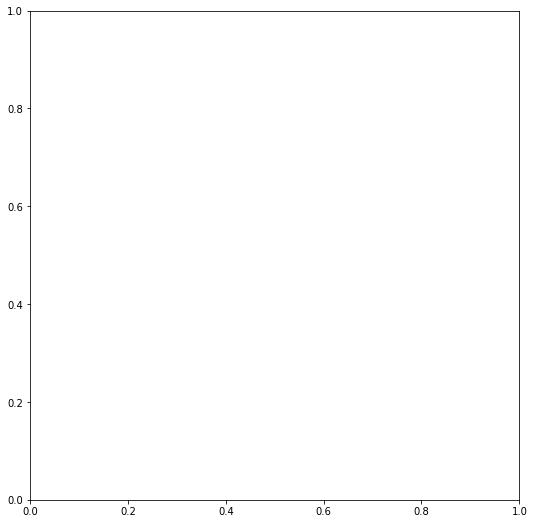

In [46]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap= 'wes', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

In [ ]:
# I am unsure why the wes anderson palette is not being recognized. I looked at the documentation for palettable
# but there was no fix I could find

# I tried importing the color palette using
from palettable.colorbrewer import Darjeeling2_5 as wes
#but this also did not work

In [ ]:
# Overall, this data show that the price per person is highest on the north east side/near north side.
# The Lincoln Park, Lakeview, Streeterville, and Gold Coast areas are all in the top quantiles (high whisker, top outlier)
# for each map. This would make sense as these neighbrohoods have high property values, are considered safe, and are located
# near enetertainment, food, and nightlife
# There are also the areas of Scottsdale/Ashburn and Austin/Galewood that are shown to have very high price 
# per person.

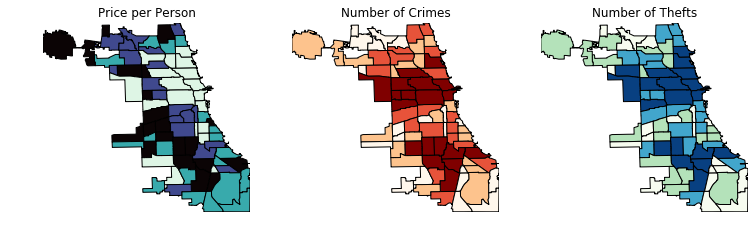

In [52]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap = 'mako', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price per Person")
df.plot(column='num_crimes', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Number of Crimes")
df.plot(column='num_theft', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Number of Thefts")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [ ]:
# I wanted to look at the price per person of an airbnb and see if there was a negative correlation between the price
# and the number of crimes in that neighborhood. 
# while we would expect the safer/nicer neighborhoods to be the ones with higher prices, these maps show that the 
# neighborhoods with the highest price per person also have the highest quantiles for crime and theft.
# This means there is likely another factor that is not included in these maps, such as police presence or population 
#behind this phenomena.